### More EDA
***

Here I make a graph and try to get some data ready for the Naive Bayes (NB) model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv('sendtime_dataset.csv')

Just the standard imports and dataframe load at the beginning of any project.

In [2]:
df.fillna(-1, inplace=True)
def time_convert(x):
    if(x == -1):
        return -1
    else:
        return x % 86400

df['delivered_TOD'] = [time_convert(x) for x in df['delivered_time']]
df['open_TOD'] = [time_convert(x) for x in df['open_time']]
df.head()

,userid,email,delivered_time,open_time,click_time,delivered_TOD,open_TOD
0,346831,4d48b86a4581bbb66948b646cc9aa1ccb7c518c8ec72da...,1537840343,-1.000000e+00,-1.0,6743,-1.0
1,346831,0cb73fdcbfa76a8eac0a0b4af722ce79cd8cdf3e81b3ae...,1537887466,-1.000000e+00,-1.0,53866,-1.0
2,346831,947143456bd1abdc09897ac2d47ca9bf99fc67e744f8f8...,1537840357,1.537844e+09,-1.0,6757,10153.0
3,346831,febff9b2078f6790e3484bf39dc6f04daaae38cd8b8f79...,1537840336,-1.000000e+00,-1.0,6736,-1.0
4,346831,0522bc59fa40ee24491ee5dcc193e5113c8471153cc29c...,1537840358,-1.000000e+00,-1.0,6758,-1.0


Replace the NaN's with -1's, add two new columns that are the delivered and open times in a time of day reference.

In [3]:
def yes_no_open(x):
    if(x == -1):
        return 0
    else:
        return 1
    
df['bin_open'] = [yes_no_open(x) for x in df['open_time']]
df.head()

,userid,email,delivered_time,open_time,click_time,delivered_TOD,open_TOD,bin_open
0,346831,4d48b86a4581bbb66948b646cc9aa1ccb7c518c8ec72da...,1537840343,-1.000000e+00,-1.0,6743,-1.0,0
1,346831,0cb73fdcbfa76a8eac0a0b4af722ce79cd8cdf3e81b3ae...,1537887466,-1.000000e+00,-1.0,53866,-1.0,0
2,346831,947143456bd1abdc09897ac2d47ca9bf99fc67e744f8f8...,1537840357,1.537844e+09,-1.0,6757,10153.0,1
3,346831,febff9b2078f6790e3484bf39dc6f04daaae38cd8b8f79...,1537840336,-1.000000e+00,-1.0,6736,-1.0,0
4,346831,0522bc59fa40ee24491ee5dcc193e5113c8471153cc29c...,1537840358,-1.000000e+00,-1.0,6758,-1.0,0


Create column where opens are a binary yes or no values

In [4]:
open_TOD_list = df['open_TOD'].where(df['open_TOD'] != -1)
final_TOD_list = open_TOD_list.dropna()

Make a list that is only emails that have an open time, this is just for the graphs below.

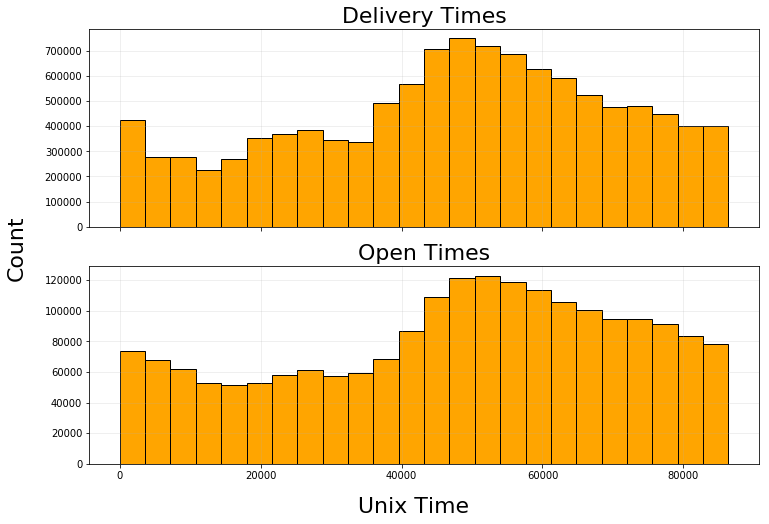

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12,8))
fig.subplots_adjust(hspace=0.2)
fig.text(0.5, 0.04, 'Unix Time', ha='center', fontsize=22)
fig.text(0.03, 0.5, 'Count', va='center', rotation='vertical', fontsize=22)
ax[0].hist(df['delivered_TOD'], bins=24, color='orange', edgecolor='black')
ax[0].set_title('Delivery Times', fontsize = 22)
ax[0].grid(True, alpha=0.25)
ax[1].hist(final_TOD_list, bins=24, color='orange', edgecolor='black')
ax[1].set_title('Open Times', fontsize = 22)
ax[1].grid(True, alpha=0.25)

This is a histogram of the TOD columns, there are 24 bins, which represent hours of the day.

In [6]:
dfMin = df[df['open_TOD'] != -1]
dfMin = dfMin[:100000]

Make a minimized datase where there are only emails with an open time.

WARNING: THE BELOW FUNCTION IS VERY COMPUTATIONALLY EXPENSIVE, $O(n^2)$ RUNTIME.

In [7]:
def email_id_calc(arr):
    index = 0
    loop_val = 0
    memoize = []
    res_set = []
    total = len(arr)
    part_done = [round((x/10)*len(arr)) for x in range(1, 11)]
    for x in arr:
        if loop_val in part_done:
            print((part_done.index(loop_val)+1)*10, '% of array done')
        loop_val += 1
        if x in memoize:
            res_set.append(memoize.index(x))
        else:
            memoize.append(x)
            res_set.append(index)
            index += 1
    print('Finished')
    return res_set

dfMin['email_id'] = email_id_calc(dfMin['email'])

10 % of array done
20 % of array done
30 % of array done
40 % of array done
50 % of array done
60 % of array done
70 % of array done
80 % of array done
90 % of array done
Finished


This gives me an email_id values that is a number so I can use it as a feature

In [8]:
dfMin.head()

,userid,email,delivered_time,open_time,click_time,delivered_TOD,open_TOD,bin_open,email_id
2,346831,947143456bd1abdc09897ac2d47ca9bf99fc67e744f8f8...,1537840357,1.537844e+09,-1.000000e+00,6757,10153.0,1,0
26,1383044,63619225d02aedcadc35041cfeaf5a222134734d87917f...,1537894865,1.537965e+09,-1.000000e+00,61265,45265.0,1,1
32,1383044,ad6601e04ceb08900aeca65c6d0c451b8bf4769d203a9c...,1537894666,1.537976e+09,-1.000000e+00,61066,55738.0,1,2
37,13641,87507a6f8d888a1a29ec73d60c4182318262783be0b97b...,1537918715,1.537920e+09,-1.000000e+00,85115,86337.0,1,3
45,13641,272f19dd7a791b7cac8745024d842a4bafc80b907d9fe6...,1537875505,1.537876e+09,1.537876e+09,41905,41912.0,1,4


In [9]:
train, test = train_test_split(dfMin, test_size=0.2)

Split the data into testing and training data with this function.

In [10]:
gnb = GaussianNB()

Build a gaussian naive bayes model.

In [11]:
features = ['delivered_TOD', 'email_id']
gnb.fit(train[features], train['open_TOD'])

GaussianNB(priors=None)

Train the model with features and target variable.

In [12]:
pred = gnb.predict(test[features])

Check model with test set

In [13]:
def accuracy_TOD(p, te, ti):
    count = 0
    for n in range(len(p)):
        if(te[n]-(ti*30) <= p[n] <= te[n]+(ti*30)):
            count+=1
    return count/len(p)
    

accuracy_TOD(pred, test['open_TOD'].values, 10)

0.0971

The function takes in the predicted array, the test array, and the number of minutes that I want to give a window for the prediction to be in.

In [14]:
mnb = MultinomialNB()
mnb.fit(train[features], train['open_TOD'])
pred2 = mnb.predict(test[features])
accuracy_TOD(pred2, test['open_TOD'].values, 10)

0.0103

This is the same thing but for a different feature distribution. This one appears to be worse.

In [15]:
bnb = BernoulliNB()
bnb.fit(train[features], train['open_TOD'])
pred3 = bnb.predict(test[features])
accuracy_TOD(pred3, test['open_TOD'].values, 10)

0.0094

Again the same process but for the bernoulli distribution.

Clearly the gaussian algorithm works best given input parameters email_id and delivered_time. 

New try predicting just whether an email will be opened or not using delivery time as a feature.

In [16]:
dfMin2 = df[200000:300000]

Make new minimized dataset but there are emails that are not opened

In [17]:
print(len(dfMin2))
print(dfMin2['bin_open'].sum())

100000
16784


Look like there are a total of 16,784 opened emails out of 100,000 total.

In [24]:
dfMin2['email_id'] = email_id_calc(dfMin2['email'])
dfMin2['diff_open_deli']=[dfMin2['open_TOD']-dfMin2['delivered_TOD']]
dfMin2.head()

10 % of array done
20 % of array done
30 % of array done
40 % of array done
50 % of array done
60 % of array done
70 % of array done
80 % of array done
90 % of array done
Finished


ValueError: Length of values does not match length of index

In [19]:
train2, test2 = train_test_split(dfMin2, test_size=0.2)

In [20]:
gnb2 = GaussianNB()
gnb2.fit(train2[features], train2['bin_open'])
pred4 = gnb2.predict(test2[features])

In [21]:
bnb2 = BernoulliNB()
bnb2.fit(train2[features], train2['bin_open'])
pred5 = bnb2.predict(test2[features])